<a href="https://colab.research.google.com/github/fanurs/pytorch-notes/blob/main/notes/tut05_a_chain_of_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import torch as th

# The simplest network - a 1D chain of neurons

An artificial neural network (ANN) is made up of many artificial neurons. Artificial neurons are inspired from biological neurons. We shall use $a$ with appropriate subscripts or superscripts to denote artificial neurons in this tutorial. The adjective "artificial" will be dropped from now on.

## Neurons

Artificial neurons can be better understood by considering a network of them. We will start with a one-dimensional chain of neurons,
$$a_0\rightarrow a_1\rightarrow a_2\rightarrow \cdots \rightarrow a_n \ . $$
The first neuron $a_0$ is called the "input neuron"; the last neuron $a_n$ is called the "output neuron". All the other neurons are called the "hidden neurons" because if we encapsulate the entire chain of network into a black box, then only the input neuron and the output neuron are visible externally.

## Weights

We can use graph to describe a neural network. A graph consists of nodes (neurons) and edges. In this example, all edges are directional. On each edge, there is a weight $w_{i, i-1}\in\mathbb{R}$ associated with it:
$$ a_0 \xrightarrow{w_{10}} a_1 \xrightarrow{w_{21}} a_2 \xrightarrow{w_{32}} \cdots \xrightarrow{w_{n, n-1}} a_n \ . $$

## Activation function

The network we have just constructed is a "_feedforward neural network_", in which information fed to the input neuron(s) will be propagated forward successively until the output neuron(s). All neurons, except the input neurons, take the outputs from their predecessors as inputs. Mathematically, we have $ a_i = w_{i, i-1}\cdot a_{i-1} $ for all $i = 1, \ldots, n$. But this is not very useful from past experience. To better simulate a biological neuron, we usually do
$$ a_i = g(w_{i, i-1}\cdot a_{i-1}) \ , $$
where $g$ is an "_activation function_". An activation function _typcally_ has to satisfy both conditions:
1. Defined for all real numbers.
2. Monotonically increasing over $\mathbb{R}$.

One popular choice is the sigmoid function,
$$ \sigma(x) = \frac{1}{1 + e^{-x}} \ . $$

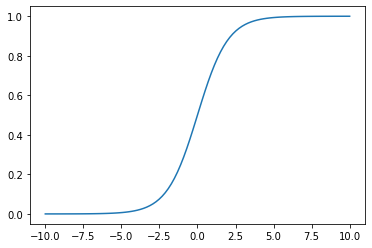

In [2]:
x = th.linspace(-10, 10, 100)
y = 1 / (1 + th.exp(-x))
plt.plot(x, y)
plt.show()

The intuitive justification for a sigmoid function is that when the input $x$ is much smaller than zero, the output will be close to zero, emulating an inactive state. On the other hand, if $x$ is much larger than zero, the output will be close to one, emulating an active state. Mathematically, an activation function introduces non-linearity to the neural network, making it possible to act as a "[_universal approximator_](https://en.wikipedia.org/wiki/Universal_approximation_theorem)".

## Bias

Most activation functions have their active-inactive switching points around zero. But this may not be the ideal point to switch in various problems. To add an extra degree of freedom, we introduce "_bias_" $b_i$, such that
$$ a_i = g(w_{i, i-1}\cdot a_{i-1} + b_i) \ . $$
This is the final iterative expression for our first simple neural network.

# Two-class classification

Let us construct the chain from scratch, and use it to perform some simple two-class classification.

This is going to be an easy problem, so we will just use two neurons, an input neuron $a_0$ and an output neuron $a_1$, with
$$ a_1 = \sigma(w\cdot a_0 + b) \ . $$
Notice that both $w$ and $b$ have no subscripts because there are only one for each of them. We have also chosen the sigmoid function as our activation function.

In [3]:
def sigmoid(x):
    return 1 / (1 + th.exp(-x))

def network(x, w, b):
    return sigmoid(w * x + b)

The problem we would like to solve is to make this network to classify real numbers from $[0, 100]$ into two classes:
1. If $x\in[0, 60)$, we assign $x$ to class $0$.
1. If $x\in[60, 100]$, we assign $x$ to class $1$.

First, we prepare 1000 training data:

In [4]:
n_train = 1000
x_train = th.rand(size=(n_train,)) * 100
y_train = (x_train >= 60) * 1.0

Next, we define the optimizer.

In [5]:
params = th.tensor([1.0, 0.0], requires_grad=True) # [weight, bias]
optimizer = th.optim.Adam([params], lr=0.1)

We then train the network for 500 epochs.

In [6]:
for _ in range(500):
    logits = network(x_train, params[0], params[1])
    loss = th.sum((logits - y_train)**2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

The loss function we use is just ordinary least squares. Here, `logits` is used to denote the outputs from the `network()` function. In machine learning, `logits` means the _raw_ output from a neural network.

## Interpreting the logits

We have trained our first neural network. Let us inspect its logits below:

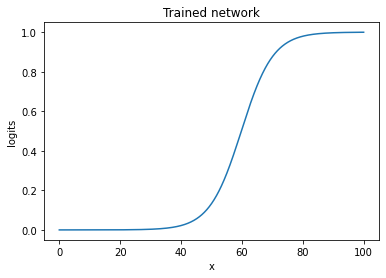

In [7]:
x_plt = th.linspace(0, 100, 1000)
plt.plot(x_plt, network(x_plt, *params.detach()))
plt.title('Trained network')
plt.xlabel('x')
plt.ylabel('logits')
plt.show()

In classification problems, the logits usually require some interpretation to obtain the predicted classes. For this problem, the logits are real numbers, whereas the classes are discrete - $0$ and $1$. A natural thought is to round the floating points of logits to either $0$ or $1$.

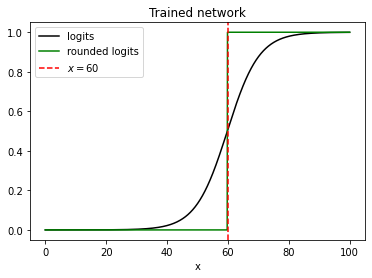

In [8]:
x_plt = th.linspace(0, 100, 1000)
plt.plot(x_plt, network(x_plt, *params.detach()), color='black', label='logits')
plt.plot(x_plt, th.round(network(x_plt, *params.detach())), color='green', label='rounded logits')
plt.axvline(60, color='red', linestyle='dashed', label=r'$x = 60$')
plt.title('Trained network')
plt.xlabel('x')
plt.legend()
plt.show()

As we can see from the plot, the rounded logits have reproduced the classification line at $x = 60$ pretty close.

## Remarks

This two-class classification example is really just a [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). To solve harder classification or regression problems, having just a single 1D chain of neurons is not enough. Starting from the next tutorial, we will explore some full-blown ANNs.

# References

- https://youtu.be/aircAruvnKk
- https://en.wikipedia.org/wiki/Mathematics_of_artificial_neural_networks
- https://en.wikipedia.org/wiki/Activation_function
- https://en.wikipedia.org/wiki/Logistic_regression